<a href="https://colab.research.google.com/github/saeek18/Saee-TSF/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP: The Sparks Foundation
# Data Science and Business Analytics Intern
# Author: Saee Kurhade
# Task 1 : Prediction Using Supervised ML

In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can be solved using simple linear regression.

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data from url

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

# Exploring Data

In [ ]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


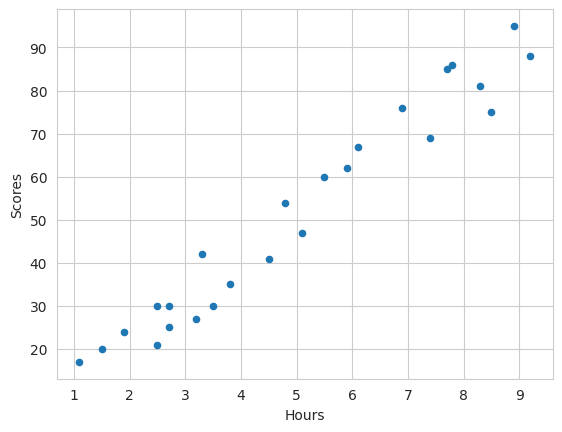

In [ ]:
data.plot(kind='scatter',x="Hours",y="Scores");
plt.show()

In [ ]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [ ]:
hours=data['Hours']
scores=data['Scores']


<ipython-input-36-a4006d7fac6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<Axes: xlabel='Hours', ylabel='Density'>

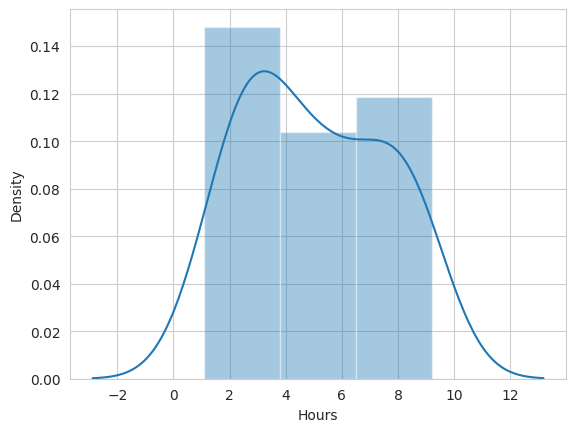

In [ ]:
sns.distplot(hours)

<ipython-input-37-cd71314d34aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<Axes: xlabel='Scores', ylabel='Density'>

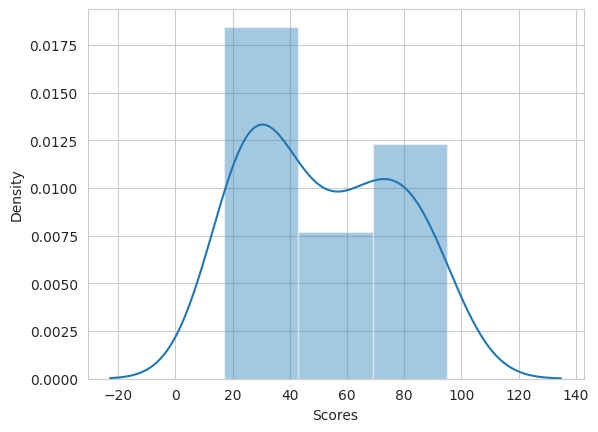

In [ ]:
sns.distplot(scores)

#Linear Regression

In [ ]:
X= data.iloc[:, :-1].values
y= data.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 50)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

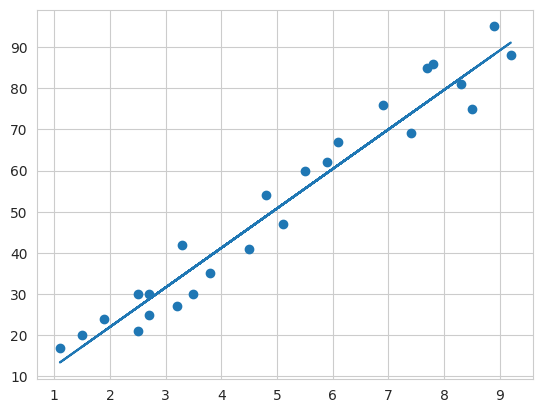

In [ ]:
m= reg.coef_
c= reg.intercept_
line= m*X+c
plt.scatter(X, y)
plt.plot(X , line);
plt.show()


In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


<ipython-input-44-83a2d67249e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(y_test-y_pred))


<function matplotlib.pyplot.show(close=None, block=None)>

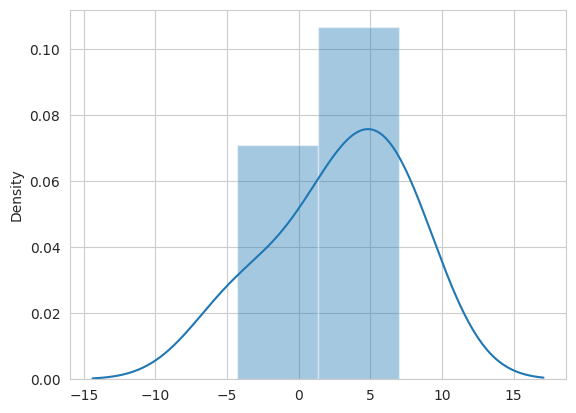

In [ ]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show

# What is the predicted score if a student studies for 9.25 hrs/day ?

In [ ]:
h= 9.25
s= reg.predict([[h]])
print(" If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

 If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


# Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(' Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print (' R2 Score:', r2_score(y_test, y_pred))


 Mean Absolute Error: 4.5916495300630285
 R2 Score: 0.971014141329942
